# Implementing the simple model

In [1]:
#Import the relevant modules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import OpinionGraph
import OpinionAlgorithm

## Create random graph
This is implemented as a `MultiGraph` from `Networkx` which can have self-loops and multi-edges. The function that creates the random graph, `OpinionGraph.CreateRandom` creates a graph with NO self-loops and NO multi-edges.

In [2]:
n = 30 # number of nodes
m = 120 #number of edges
gamma = 10 #ratio #nodes/#opinions
n_opinion = int(n/gamma) #number of opinions

#Generate random graph
G1 = OpinionGraph.CreateRandom(n, m, n_opinion)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


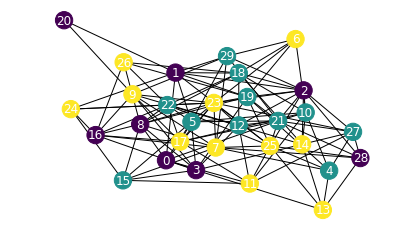

In [3]:
#plot the opinion graph
G1.plot()

In [4]:
G1.summary()

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: False
Consensus reached: False
Percentage of nodes in components in consensus state: 0.0


## Tests of the algorithm
### A) With $\phi=1$, i.e. only step 1

------------- Initial graph ------------


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


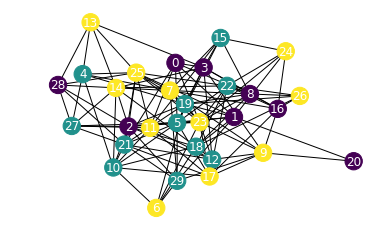

------------- Step 0 ------------
Selected node_i : 7
DOING STEP 1
Neighbors of node_i : [4, 23, 8, 9, 29, 15, 16, 25, 28]
Selected node_j : 8
Nodes with opinion g_i : [6, 9, 11, 13, 14, 17, 23, 24, 25, 26]
Selected node_j_prime : 11
Edge moved from (7,8) to (7,11)


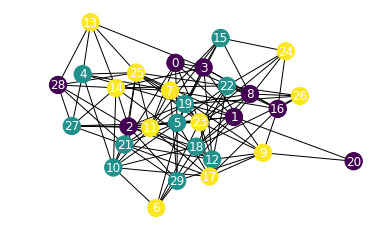

------------- Step 1 ------------
Selected node_i : 17
DOING STEP 1
Neighbors of node_i : [5, 9, 10, 11, 16, 23, 22, 21]
Selected node_j : 5
Nodes with opinion g_i : [6, 7, 9, 11, 13, 14, 23, 24, 25, 26]
Selected node_j_prime : 13
Edge moved from (17,5) to (17,13)


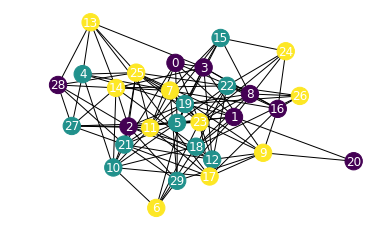

------------- Step 2 ------------
Selected node_i : 9
DOING STEP 1
Neighbors of node_i : [3, 7, 17, 20, 16, 23, 29, 12]
Selected node_j : 3
Nodes with opinion g_i : [6, 7, 11, 13, 14, 17, 23, 24, 25, 26]
Selected node_j_prime : 25
Edge moved from (9,3) to (9,25)


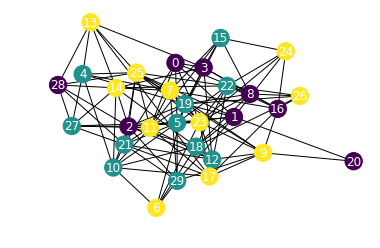

------------- Step 3 ------------
Selected node_i : 13
DOING STEP 1
Neighbors of node_i : [3, 4, 25, 14, 28, 17]
Selected node_j : 25
Nodes with opinion g_i : [6, 7, 9, 11, 14, 17, 23, 24, 25, 26]
Selected node_j_prime : 6
Edge moved from (13,25) to (13,6)


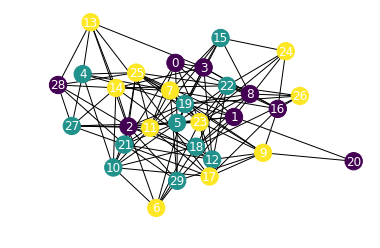

------------- Step 4 ------------
Selected node_i : 9
DOING STEP 1
Neighbors of node_i : [7, 17, 20, 16, 23, 29, 12, 25]
Selected node_j : 17
Nodes with opinion g_i : [6, 7, 11, 13, 14, 17, 23, 24, 25, 26]
Selected node_j_prime : 6
Edge moved from (9,17) to (9,6)


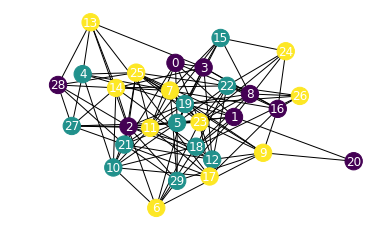

------------- Step 5 ------------
Selected node_i : 2
DOING STEP 1
Neighbors of node_i : [1, 19, 28, 10, 18, 27, 14, 25, 29, 23, 21, 12]
Selected node_j : 18
Nodes with opinion g_i : [0, 1, 3, 8, 16, 20, 28]
Selected node_j_prime : 8
Edge moved from (2,18) to (2,8)


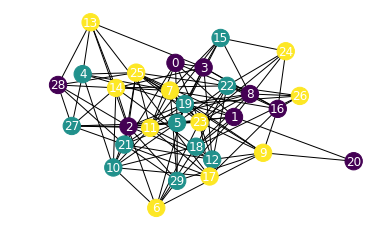

------------- Step 6 ------------
Selected node_i : 12
DOING STEP 1
Neighbors of node_i : [2, 3, 9, 11, 18, 23, 21]
Selected node_j : 2
Nodes with opinion g_i : [4, 5, 10, 15, 18, 19, 21, 22, 27, 29]
Selected node_j_prime : 18
Edge moved from (12,2) to (12,18)


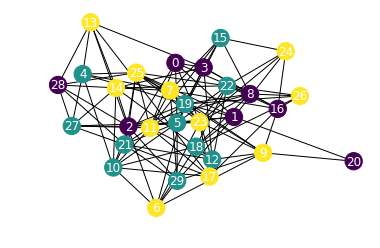

------------- Step 7 ------------
Selected node_i : 16
DOING STEP 1
Neighbors of node_i : [3, 7, 8, 9, 17, 26, 22, 24]
Selected node_j : 9
Nodes with opinion g_i : [0, 1, 2, 3, 8, 20, 28]
Selected node_j_prime : 8
Edge moved from (16,9) to (16,8)


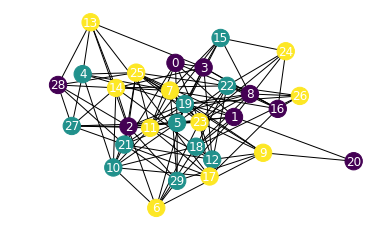

------------- Step 8 ------------
Selected node_i : 5
DOING STEP 1
Neighbors of node_i : [0, 1, 3, 23, 22, 15, 21, 29, 10]
Selected node_j : 21
Nodes with opinion g_i : [4, 10, 12, 15, 18, 19, 21, 22, 27, 29]
Selected node_j_prime : 22
Edge moved from (5,21) to (5,22)


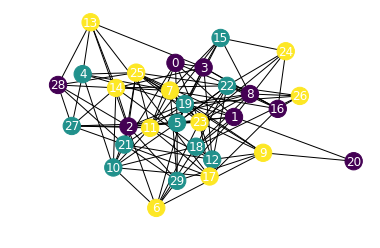

------------- Step 9 ------------
Selected node_i : 14
DOING STEP 1
Neighbors of node_i : [2, 3, 10, 13, 18, 27, 22]
Selected node_j : 3
Nodes with opinion g_i : [6, 7, 9, 11, 13, 17, 23, 24, 25, 26]
Selected node_j_prime : 26
Edge moved from (14,3) to (14,26)


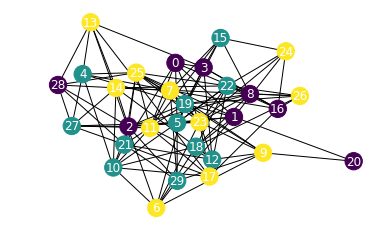

In [5]:
phi = 1
n_step = 10
OpinionAlgorithm.Simulation(G1, phi, n_step, verbose=True)

------------- Initial graph ------------


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


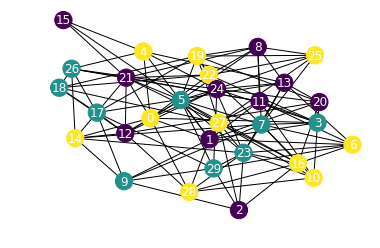

------------- Final graph -------------
**** Same layout **** 


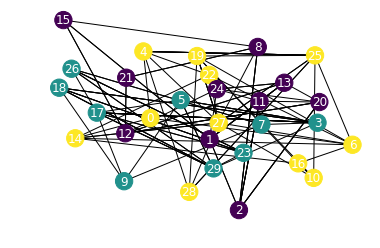

**** New layout **** 


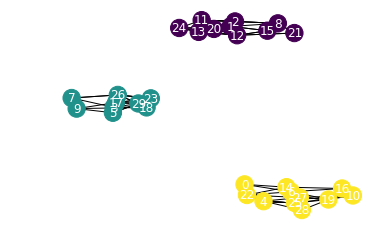

In [6]:
n_step = 1000
G2 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G2, phi, n_step, verboseBeginEnd=True)

In [7]:
G2.summary()

Total number of components: 3
Components size: Counter({11: 1, 10: 1, 9: 1})
All components in consensus: True
Consensus reached: True
Percentage of nodes in components in consensus state: 1.0


In [8]:
G3 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.SimulationEndConsensus(G3, phi, verbose=False)

384

In [9]:
G3.summary()

Total number of components: 3
Components size: Counter({8: 1, 10: 1, 12: 1})
All components in consensus: True
Consensus reached: True
Percentage of nodes in components in consensus state: 1.0


### B) With $\phi=0$, i.e. only step 2

------------- Initial graph ------------


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


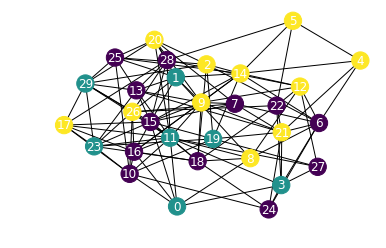

------------- Step 0 ------------
Selected node_i : 6
DOING STEP 2
Neighbors of node_i : [2, 3, 4, 14, 7, 21, 24, 8, 12]
Selected node_j : 21
Opinion of node 6 changed from 0 to 2


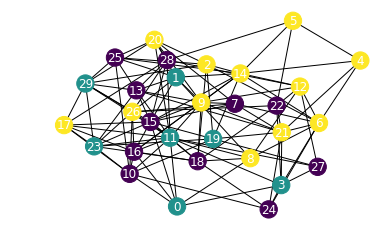

------------- Step 1 ------------
Selected node_i : 11
DOING STEP 2
Neighbors of node_i : [0, 3, 8, 9, 10, 16, 23, 13, 29, 17, 27, 26, 20, 18, 28, 15]
Selected node_j : 0


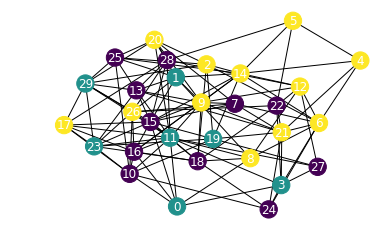

------------- Step 2 ------------
Selected node_i : 16
DOING STEP 2
Neighbors of node_i : [0, 9, 10, 11, 14, 15, 17, 18, 26]
Selected node_j : 15


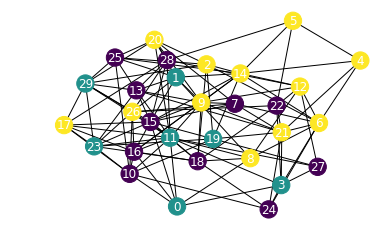

------------- Step 3 ------------
Selected node_i : 13
DOING STEP 2
Neighbors of node_i : [1, 9, 11, 28, 29, 21, 15, 25, 23]
Selected node_j : 1
Opinion of node 13 changed from 0 to 1


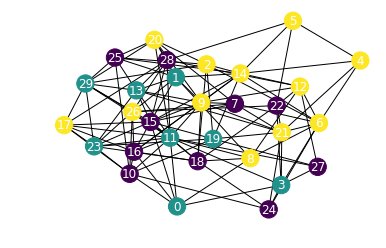

------------- Step 4 ------------
Selected node_i : 11
DOING STEP 2
Neighbors of node_i : [0, 3, 8, 9, 10, 16, 23, 13, 29, 17, 27, 26, 20, 18, 28, 15]
Selected node_j : 16
Opinion of node 11 changed from 1 to 0


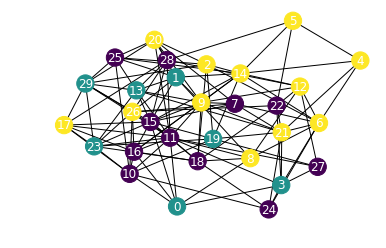

------------- Step 5 ------------
Selected node_i : 28
DOING STEP 2
Neighbors of node_i : [5, 11, 12, 13, 15, 17, 20, 26]
Selected node_j : 17
Opinion of node 28 changed from 0 to 2


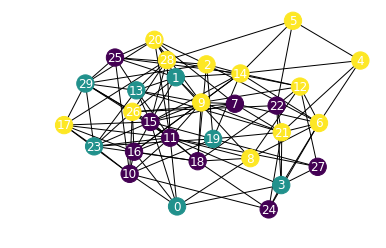

------------- Step 6 ------------
Selected node_i : 21
DOING STEP 2
Neighbors of node_i : [3, 4, 6, 7, 9, 13, 19, 24, 22]
Selected node_j : 9


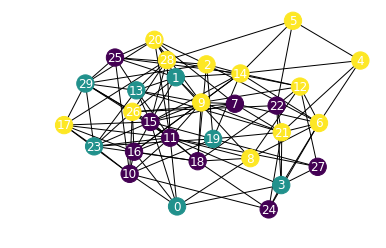

------------- Step 7 ------------
Selected node_i : 25
DOING STEP 2
Neighbors of node_i : [1, 2, 10, 13, 14, 20, 29]
Selected node_j : 10


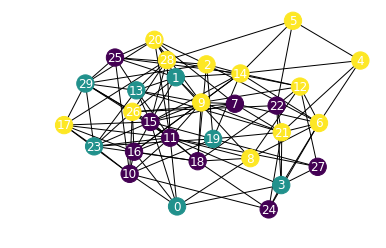

------------- Step 8 ------------
Selected node_i : 27
DOING STEP 2
Neighbors of node_i : [3, 11, 12, 19]
Selected node_j : 3
Opinion of node 27 changed from 0 to 1


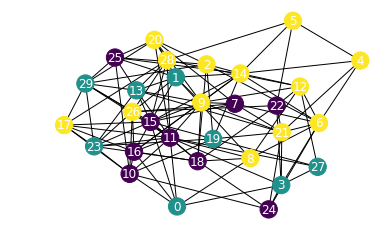

------------- Step 9 ------------
Selected node_i : 28
DOING STEP 2
Neighbors of node_i : [5, 11, 12, 13, 15, 17, 20, 26]
Selected node_j : 11
Opinion of node 28 changed from 2 to 0


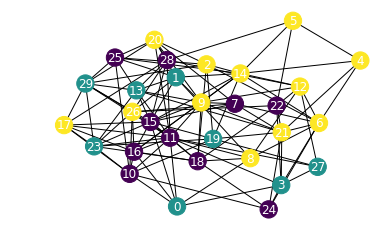

------------- Step 10 ------------
Selected node_i : 1
DOING STEP 2
Neighbors of node_i : [15, 9, 8, 26, 25, 13, 14, 20]
Selected node_j : 25
Opinion of node 1 changed from 1 to 0


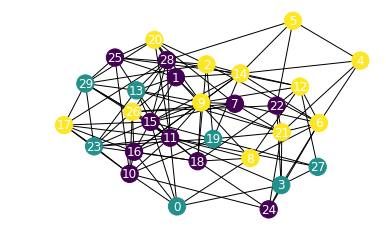

------------- Step 11 ------------
Selected node_i : 9
DOING STEP 2
Neighbors of node_i : [1, 7, 11, 13, 20, 15, 18, 12, 21, 16, 14]
Selected node_j : 21


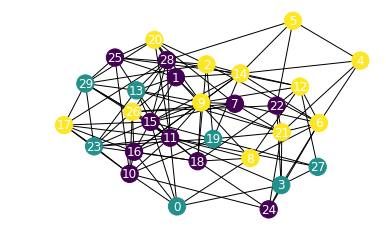

------------- Step 12 ------------
Selected node_i : 22
DOING STEP 2
Neighbors of node_i : [3, 5, 12, 18, 21, 26]
Selected node_j : 12
Opinion of node 22 changed from 0 to 2


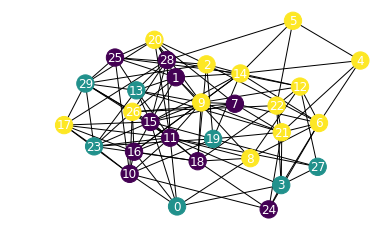

------------- Step 13 ------------
Selected node_i : 12
DOING STEP 2
Neighbors of node_i : [6, 8, 9, 14, 22, 27, 28]
Selected node_j : 14


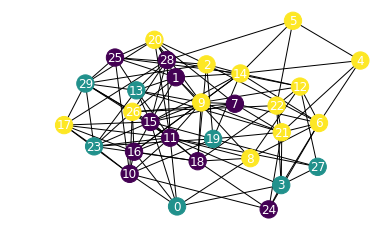

------------- Step 14 ------------
Selected node_i : 12
DOING STEP 2
Neighbors of node_i : [6, 8, 9, 14, 22, 27, 28]
Selected node_j : 27
Opinion of node 12 changed from 2 to 1


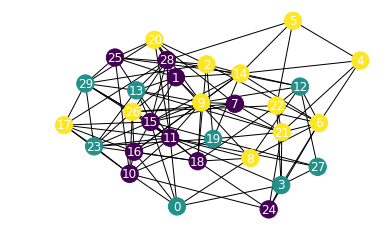

------------- Step 15 ------------
Selected node_i : 14
DOING STEP 2
Neighbors of node_i : [1, 2, 4, 5, 6, 9, 12, 16, 15, 19, 25]
Selected node_j : 1
Opinion of node 14 changed from 2 to 0


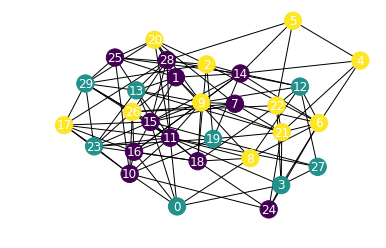

------------- Step 16 ------------
Selected node_i : 10
DOING STEP 2
Neighbors of node_i : [0, 19, 26, 24, 16, 25, 23, 11, 17]
Selected node_j : 0
Opinion of node 10 changed from 0 to 1


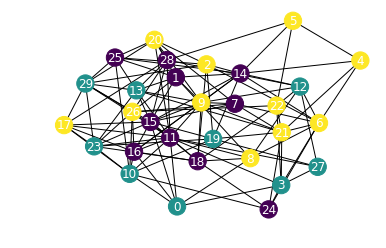

------------- Step 17 ------------
Selected node_i : 13
DOING STEP 2
Neighbors of node_i : [1, 9, 11, 28, 29, 21, 15, 25, 23]
Selected node_j : 25
Opinion of node 13 changed from 1 to 0


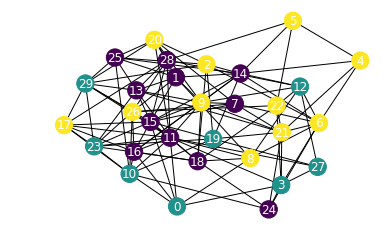

------------- Step 18 ------------
Selected node_i : 28
DOING STEP 2
Neighbors of node_i : [5, 11, 12, 13, 15, 17, 20, 26]
Selected node_j : 17
Opinion of node 28 changed from 0 to 2


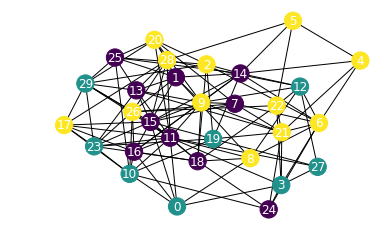

------------- Step 19 ------------
Selected node_i : 22
DOING STEP 2
Neighbors of node_i : [3, 5, 12, 18, 21, 26]
Selected node_j : 18
Opinion of node 22 changed from 2 to 0


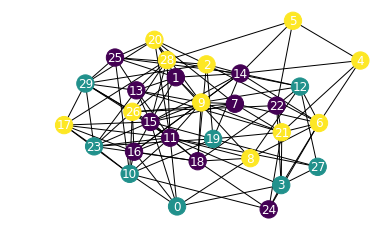

------------- Step 20 ------------
Selected node_i : 8
DOING STEP 2
Neighbors of node_i : [0, 1, 6, 12, 18, 11]
Selected node_j : 11
Opinion of node 8 changed from 2 to 0


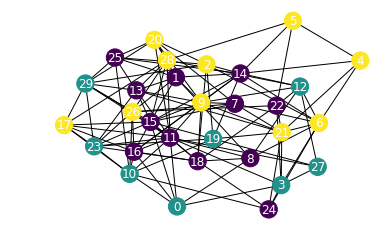

------------- Step 21 ------------
Selected node_i : 23
DOING STEP 2
Neighbors of node_i : [10, 11, 13, 15, 17, 18, 19, 26, 29]
Selected node_j : 10


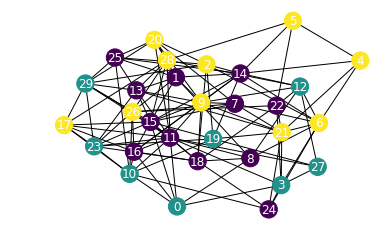

------------- Step 22 ------------
Selected node_i : 3
DOING STEP 2
Neighbors of node_i : [0, 11, 24, 6, 21, 27, 22]
Selected node_j : 27


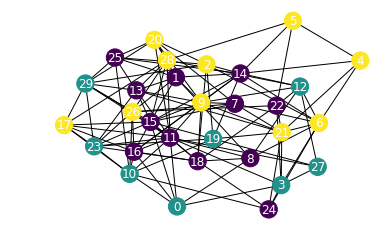

------------- Step 23 ------------
Selected node_i : 17
DOING STEP 2
Neighbors of node_i : [10, 11, 15, 16, 23, 29, 28]
Selected node_j : 23
Opinion of node 17 changed from 2 to 1


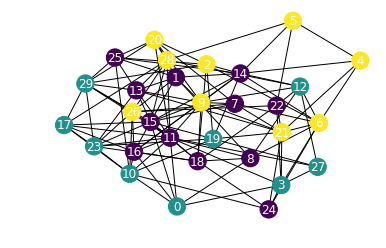

------------- Step 24 ------------
Selected node_i : 26
DOING STEP 2
Neighbors of node_i : [1, 7, 10, 11, 16, 22, 23, 28, 29]
Selected node_j : 22
Opinion of node 26 changed from 2 to 0


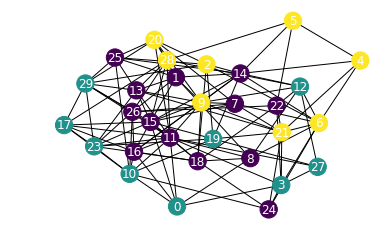

------------- Step 25 ------------
Selected node_i : 9
DOING STEP 2
Neighbors of node_i : [1, 7, 11, 13, 20, 15, 18, 12, 21, 16, 14]
Selected node_j : 16
Opinion of node 9 changed from 2 to 0


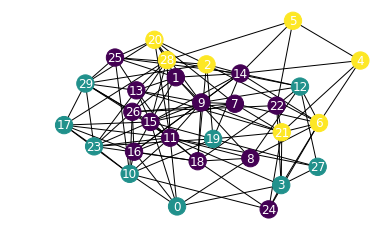

------------- Step 26 ------------
Selected node_i : 28
DOING STEP 2
Neighbors of node_i : [5, 11, 12, 13, 15, 17, 20, 26]
Selected node_j : 26
Opinion of node 28 changed from 2 to 0


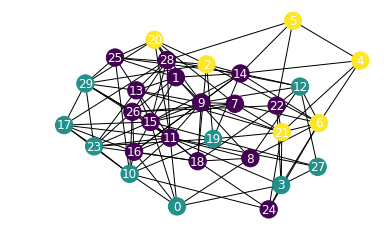

------------- Step 27 ------------
Selected node_i : 3
DOING STEP 2
Neighbors of node_i : [0, 11, 24, 6, 21, 27, 22]
Selected node_j : 21
Opinion of node 3 changed from 1 to 2


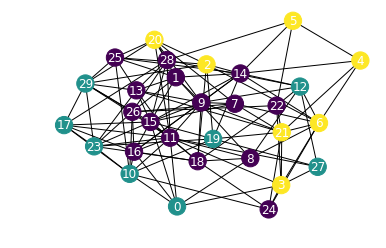

------------- Step 28 ------------
Selected node_i : 3
DOING STEP 2
Neighbors of node_i : [0, 11, 24, 6, 21, 27, 22]
Selected node_j : 22
Opinion of node 3 changed from 2 to 0


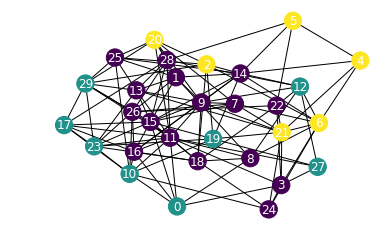

------------- Step 29 ------------
Selected node_i : 6
DOING STEP 2
Neighbors of node_i : [2, 3, 4, 14, 7, 21, 24, 8, 12]
Selected node_j : 2


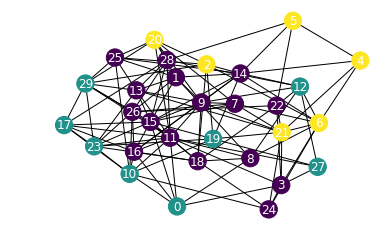

In [10]:
phi = 0
n_step = 30
G4 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G4, phi, n_step, verbose=True)

------------- Initial graph ------------


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


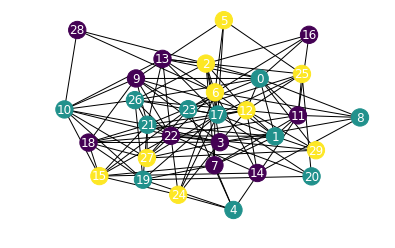

------------- Final graph -------------
**** Same layout **** 


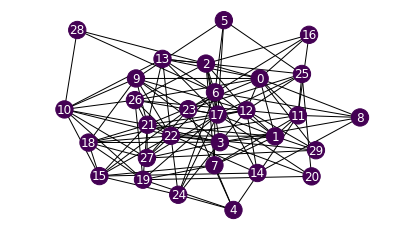

**** New layout **** 


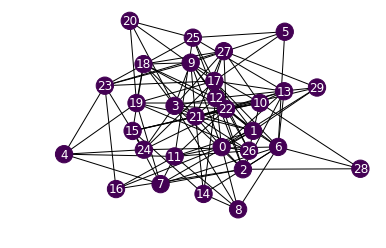

In [11]:
n_step = 1000
G5 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G5, phi, n_step, verboseBeginEnd=True)

In [12]:
G5.summary()

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: True
Consensus reached: True
Percentage of nodes in components in consensus state: 1.0


In [13]:
G6 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.SimulationEndConsensus(G6, phi, verbose=False)

410

In [14]:
G6.summary()

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: True
Consensus reached: True
Percentage of nodes in components in consensus state: 1.0


### C) With $0<\phi<1$ , i.e. mix of steps

------------- Initial graph ------------


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


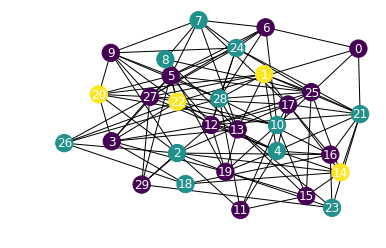

------------- Final graph -------------
**** Same layout **** 


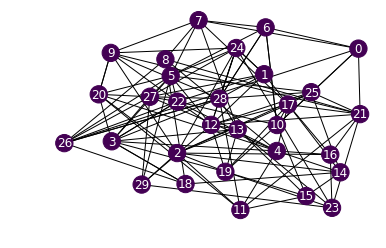

**** New layout **** 


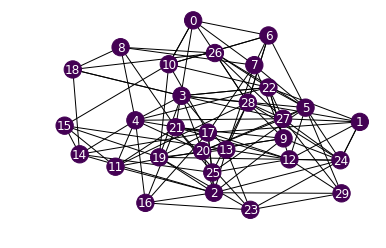

In [15]:
phi = 0.04
n_step = 1000
G7 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G7, phi, n_step, verboseBeginEnd=True)

In [16]:
G8 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.SimulationEndConsensus(G8, phi, verbose=False)

1293

In [17]:
G8.summary()

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: True
Consensus reached: True
Percentage of nodes in components in consensus state: 1.0
